In [ ]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP786: Machine Learning Fundamentals
Assignment 2 - Question 3
References: 
1. Dr. Jeff Fortuna's SEP 786 Lecture Notes
2. https://scikit-learn.org/
"""

"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP786: Machine Learning Fundamentals\nAssignment 2 - Question 3\nReferences: \n1. Dr. Jeff Fortuna's SEP 786 Lecture Notes\n2. https://scikit-learn.org/\n"

**Import Library**

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Initialize Mean and Cov Matrix**


In [ ]:
mean1 = np.array([-5,-4,-3,-2,-1,1,2,3,4,5])
mean2 = np.array([-10,-8,-6,-4,-2,2,4,6,8,10])
cov = np.matrix([[5,0.1,0,0,0,0,0,0,0,0], [0.1,5,0,0,0,0,0,0,0,0], [0,0,5,0,0,0,0,0,0,0], 
                  [0,0,0,5,0,0,0,0,0,0], [0,0,0,0,5,0.3,0,0,0,0], [0,0,0,0,0.3,5,0,0,0,0],
                  [0,0,0,0,0,0,5,0,0,0], [0,0,0,0,0,0,0,5,0,0], [0,0,0,0,0,0,0,0,5,0.2],
                  [0,0,0,0,0,0,0,0,0.2,5]])
print(cov)

[[5.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 5.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  5.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  5.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  5.  0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.3 5.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  5.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  5.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  5.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 5. ]]


**Generate Data**

In [ ]:
x1 = np.random.multivariate_normal(mean1,cov, 1000)
x2 = np.random.multivariate_normal(mean2, cov, 1000)

X = np.concatenate((x1,x2))

Xc = np.zeros(1000)
Xc = np.concatenate((Xc, np.ones(1000)))

**Code**

In [ ]:
lda = LinearDiscriminantAnalysis()
No_Features_Final = np.array([10,9,8,7,6,5]) #count = 6
Error_Final = np.ones(6)

for i in range(No_Features_Final.size): #i=0,1,2,3,4,5
  X_Selection = X
  print("The size of the best matrix till now: ", X_Selection.shape)
  Error_internal = np.ones(10-i) #Error_internal.size = 10,9,8,7,6,5

  for columns in range(10-i): #10,9,8,7,6,5
    X_Reduced = np.delete(X_Selection, columns, 1)
    lda.fit(X_Reduced,Xc)
    prediction = lda.predict(X_Reduced)
    Error_internal[columns] = sum(abs(prediction - Xc))


  print("The Error array is: ", Error_internal)
  worst_feature = np.argmin(Error_internal)
  print("Index of the worst feature is: ", worst_feature)
  X = np.delete(X, worst_feature, 1)
  Error_Final[i] = min(Error_internal)
  print("Updated Error_final array: ", Error_Final)
  print("End Of " + str(i) +"th Iteration\n")

The size of the best matrix till now:  (2000, 10)
The Error array is:  [34. 33. 22. 22. 20. 18. 26. 24. 28. 45.]
Index of the worst feature is:  5
Updated Error_final array:  [18.  1.  1.  1.  1.  1.]
End Of 0th Iteration

The size of the best matrix till now:  (2000, 9)
The Error array is:  [37. 34. 21. 20. 18. 21. 26. 31. 42.]
Index of the worst feature is:  4
Updated Error_final array:  [18. 18.  1.  1.  1.  1.]
End Of 1th Iteration

The size of the best matrix till now:  (2000, 8)
The Error array is:  [38. 36. 23. 22. 26. 26. 35. 44.]
Index of the worst feature is:  3
Updated Error_final array:  [18. 18. 22.  1.  1.  1.]
End Of 2th Iteration

The size of the best matrix till now:  (2000, 7)
The Error array is:  [46. 38. 27. 29. 29. 37. 42.]
Index of the worst feature is:  2
Updated Error_final array:  [18. 18. 22. 27.  1.  1.]
End Of 3th Iteration

The size of the best matrix till now:  (2000, 6)
The Error array is:  [60. 48. 34. 39. 42. 58.]
Index of the worst feature is:  2
Updat

**Plot**

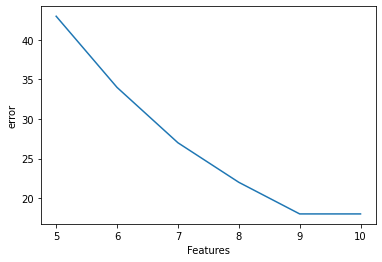

In [ ]:
plt.plot(No_Features_Final, Error_Final)
plt.xlabel("Features")
plt.ylabel("error")
plt.show()